In [1]:
import numpy as np
import pandas as pd
try:
    from skmisc.loess import loess
except ImportError:
    from util import loess
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Now, we can load the data at data.csv and turn it into the predictor X and the target y

In [2]:
# X is contained in the first column of the data, y in the second.
data = pd.read_csv('data.csv',header=None)
X = data.iloc[:,0]
Y = data.iloc[:,1]

Create a scatterplot of the data. 

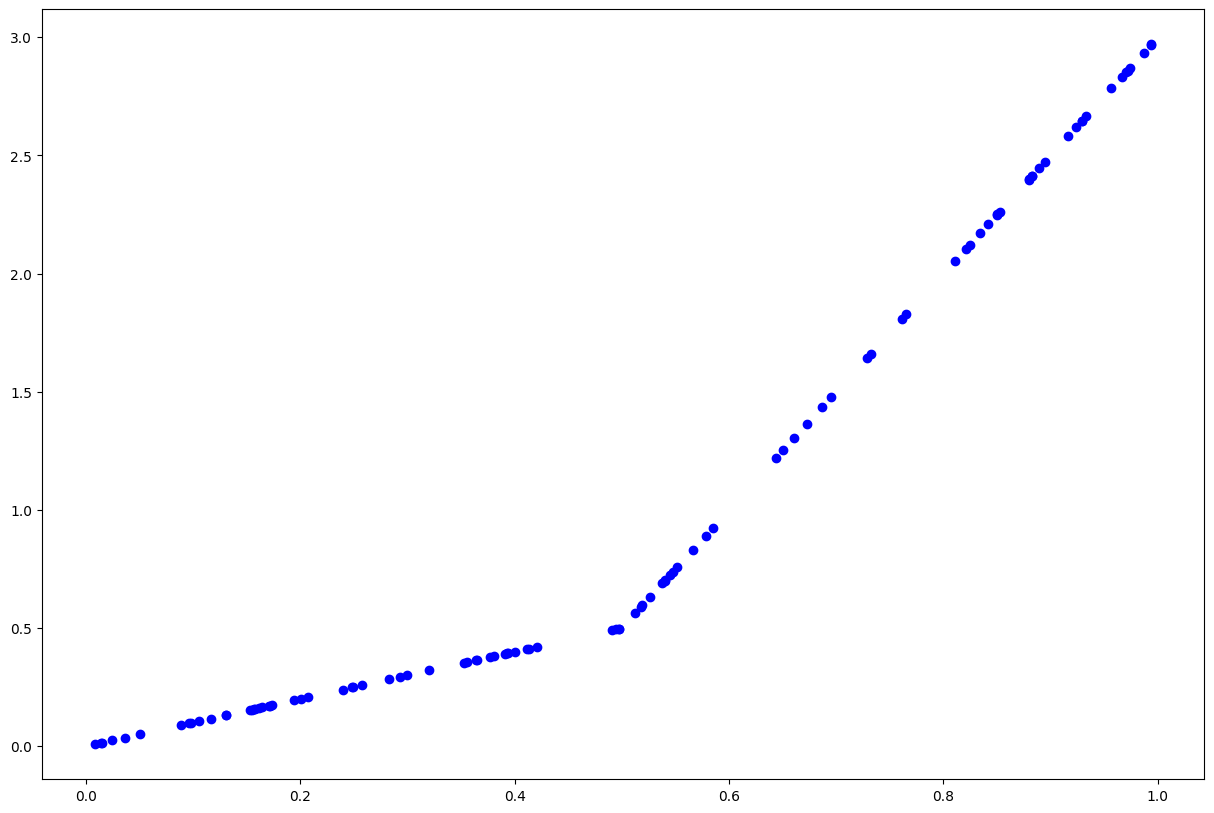

In [3]:
plt.scatter(X,Y,c='b')

#### Observations

The realtionship between two variables can be described as piecewise linear. Around $X=0.5$ the rate of slope changes once.


We now define the kernels $K_1,...,K_4$ as

In [4]:
def K1(x, x_):
    return 1

def K2(x, x_, lam):
    a=x-x_
    a=a/lam
    a=abs(a)
    a=a*a*a
    a=1-a
    b=a*a*a
    return b

def K3(x, x_, lam):
    return np.exp(-1*lam*(x-x_)*(x-x_))

def K4(x, x_, L):
    for i in range(1,L+1):
        if (i-1)/L <= x and x_ < i/L:
            return 1
    return 0

To write the function which takes $X, y$ and a kernel $K$ as input, we can do the following

In [32]:
def pred(X, y, K):
    from sklearn.metrics.pairwise import pairwise_kernels
    # Start by computing the matrix of all weights we'll need at once.
    X_=[[i] for i in X]
    #print(X_)
    matrix=pairwise_kernels(X=X_, metric=K)
    #print(matrix.shape)
    # Now, for each point we can compute the model using the corresponding weights, and make a prediction.
    y_hat=[]
    for x in range(len(X)):
        model=loess(X,y,matrix[x])
        y_hat.append(model.predict(X[x]))
    # Return a vector of the predictions at each point in X.    
    return y_hat

To actually use this function and show the fits of each kernel, we can iterate over all the kernels and fit the LOESS model for each of them.

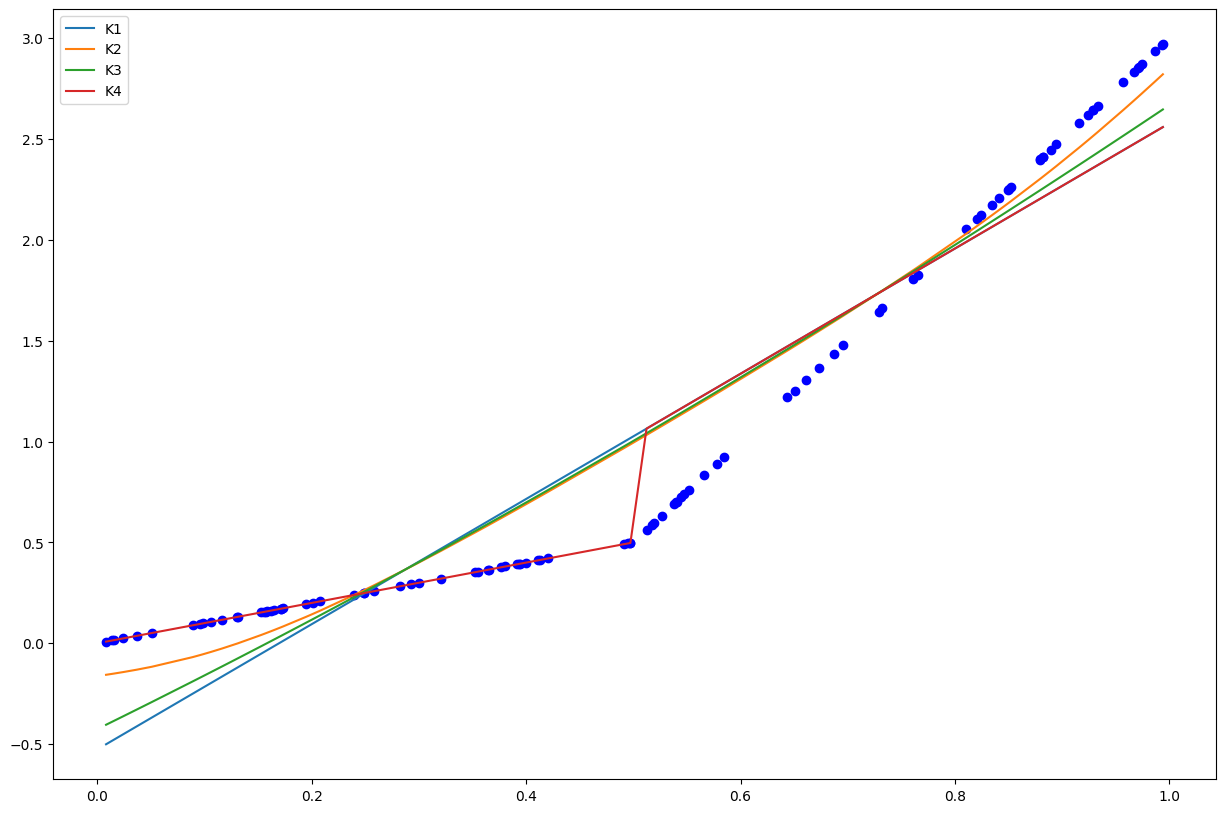

In [30]:
from functools import partial # You may want to use this to make your life easier.
plt.scatter(X, Y, c='b')
for kernel in [K1, K2, K3, K4]:
    if kernel == K1:
        plt.plot(X,pred(X,Y,kernel),label=kernel.__name__)
    elif kernel == K4:
        plt.plot(X,pred(X,Y, partial(kernel,L=2)),label=kernel.__name__)
    else:
        plt.plot(X,pred(X,Y, partial(kernel,lam=1)),label=kernel.__name__)
        
        
    
# Adding a legend so we know which kernel produced what is good style.
plt.legend()

We see...

#### Observations

First and third kernel yields similar results - straight line, which misses all the action. K4 catches the action, and yields the best results. K2 seems to smooth the endings a little, but misses the point when the data "breaks"